In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5) #일일이 그래프의 폰트 사이즈를 지정할 필요 없이 seaborn의 font_scale을 사용하면 편리

import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 프로세스
1. 데이터셋 확인 - null 확인 후 수정
2. EDA - 여러 feature들 개별적으로 분석, feature들 간 상관관계 확인, 여러 시각화 툴을 사용해 insight 얻기
3. feature engineering - 원핫 인코딩, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리
4. model 만들기 - sklearn(머신러닝), 텐서플로우 파이토치(딥러닝)
5. 모델 학습 및 예측 - train 학습 후 test 예측
6. 모델 평가

# 1. Dataset 확인

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# 1.1 Null data check

In [8]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum())/df_train[col].shape[0])
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [9]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_test[col].isnull().sum())/df_test[col].shape[0])
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


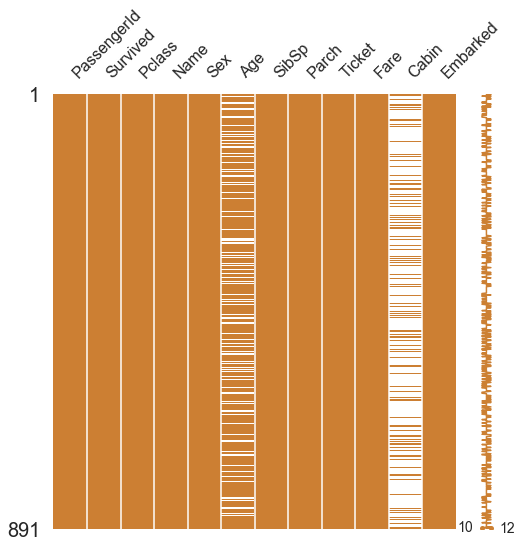

In [10]:
#msno라이브러리로 널 값 더 쉽게 보기
msno.matrix(df=df_train.iloc[:,:], figsize=(8,8), color = (0.8, 0.5, 0.2))

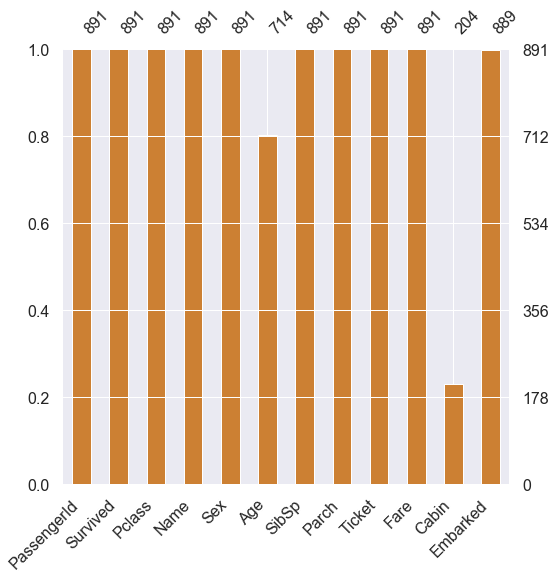

In [11]:
msno.bar(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8,0.5,0.2))

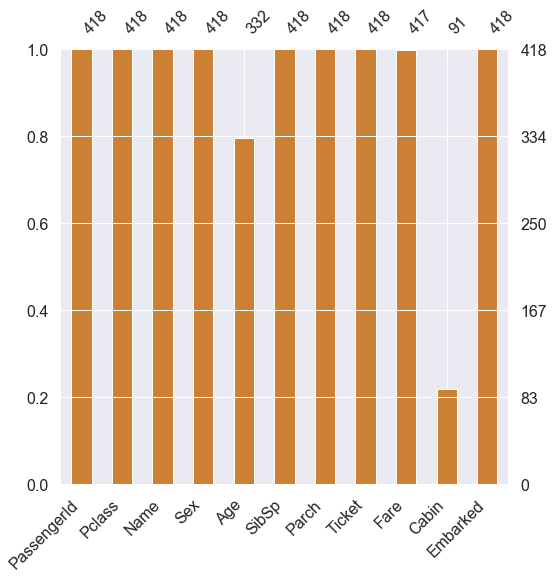

In [12]:
msno.bar(df=df_test.iloc[:,:], figsize=(8,8), color=(0.8,0.5,0.2))

# 1.2 Target label 확인
- binary classification 문제의 경우, 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라질 수 있음

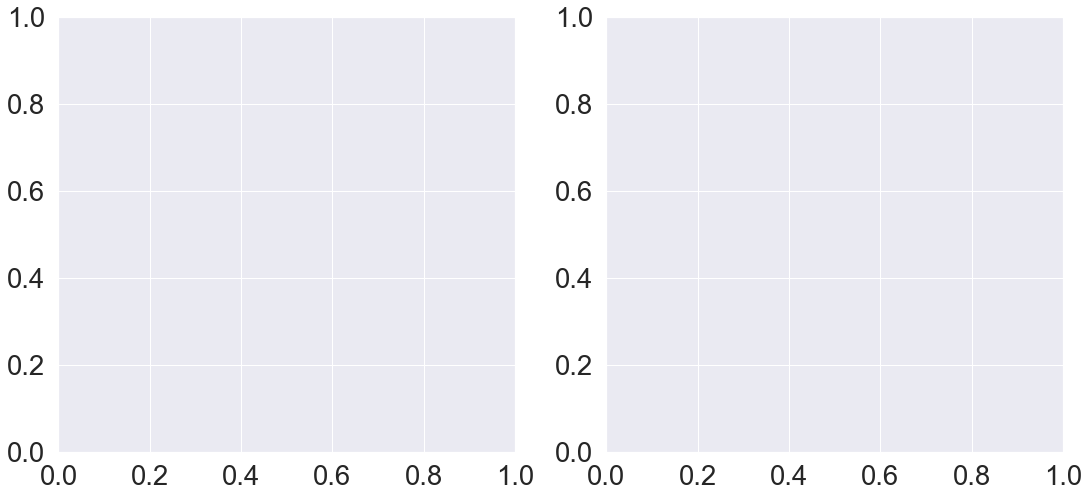

In [13]:
f, ax = plt.subplots(1,2,figsize=(18,8))

In [15]:
ax

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DDB52DCEC8>,
      dtype=object)

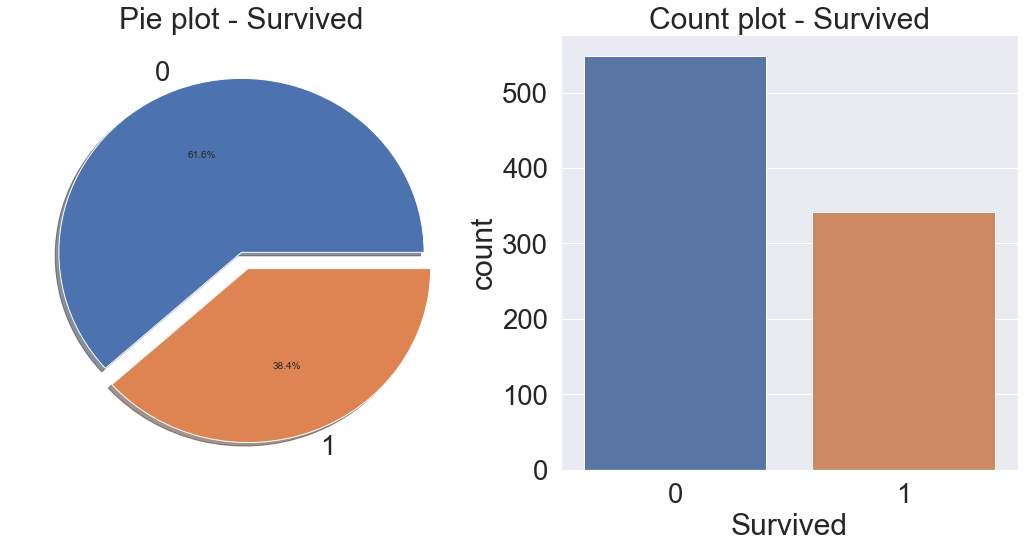

In [16]:
f, ax = plt.subplots(1,2,figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title("Pie plot - Survived")
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

### plot.pie
- explode : 확대 값(1 범주가 0에 비해 튀어나와 있음)
- autopct : 각 범주가 데이터에서 차지하는 비율 출력
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.pie.html

# 2. Exploratory data analysis
- 적절한 시각화 필요
- matplotlib, seaborn, plotly 등 특정 목적에 맞는 소스코드 정리

# 2.1 Pclass

In [19]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [20]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [21]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


### pd.crosstab(index, columns, rownames, colnames, margins(행/열 마진 추가), normalize)
- 범주형 변수로 되어있는 요인별로 교차분석해서, 행, 열 요인 기준 별로 빈도를 세어서 도수분포표, 교차표를 만들어 줌
- margins=True: 교차표의 행 합, 열 합 추가하기
- normalize=True: 구성비율로 교차표 만들기

### 데이터 재구조화
- (1) pivot(), pd.pivot_table()
- (2) stack(), unstack()
- (3) melt()
- (4) wide_to_long()
- (5) pd.crosstab()

### style.background_gradient()
- 각 열의 데이터에 따라 그라데이션의 배경 색상 지정

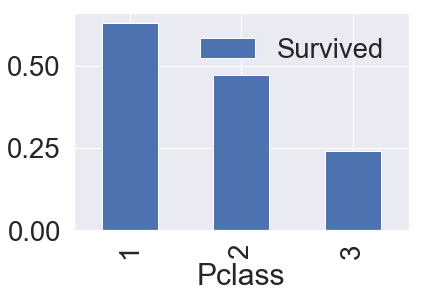

In [23]:
#pclass가 좋을수록 생존률이 높음
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

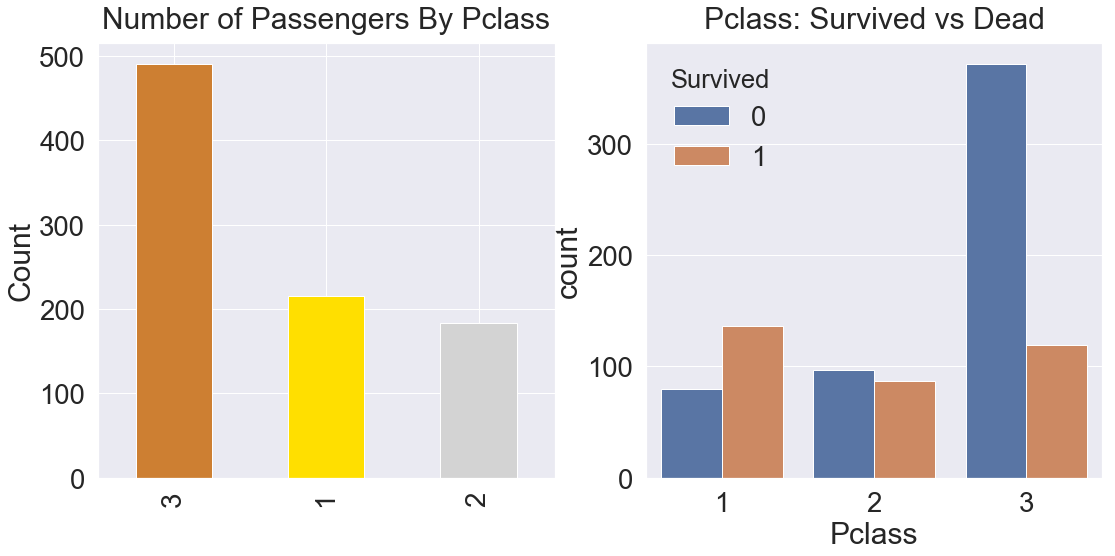

In [24]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

* 클래스가 높을수록 생존 확률이 높음.
* 생존에 Pclass가 큰 영향을 미친다고 생각해볼 수 있으며, 나중에 이 모델을 세울 때 이 feature를 사용하는 것이 좋을 것이라 판단

# 2.2 Sex

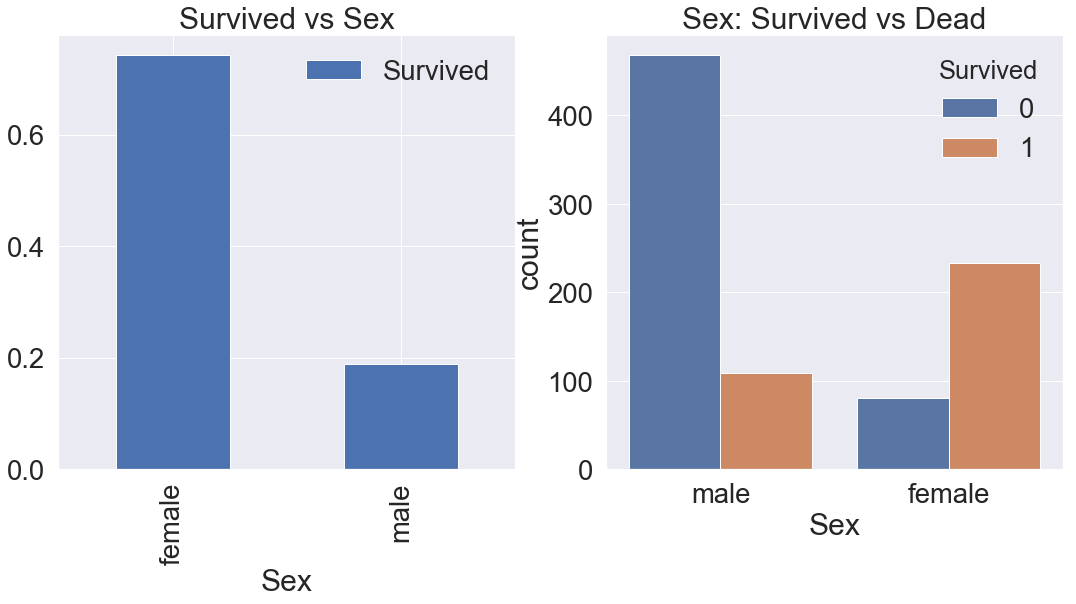

In [26]:
f, ax = plt.subplots(1,2, figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [28]:
df_train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [29]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


# 2.3 Both Sex and Pclass
- seaborn의 factorplot을 이용하면 2개의 차원으로 이뤄진 그래프를 쉽게 그릴 수 있음

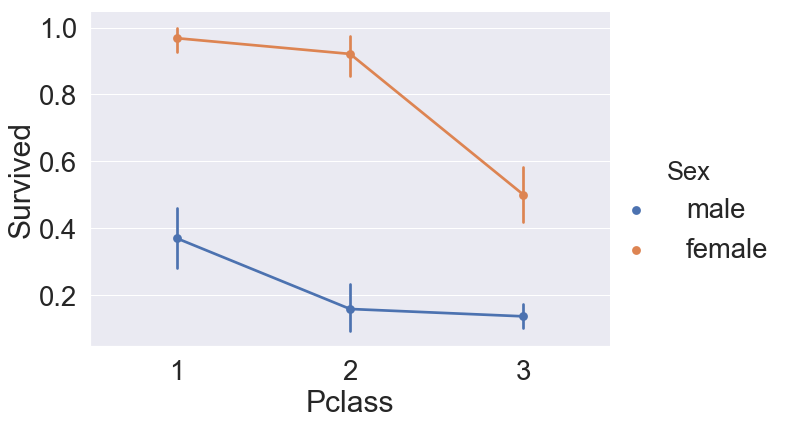

In [30]:
sns.factorplot('Pclass','Survived', hue="Sex", data=df_train, size=6, aspect=1.5)

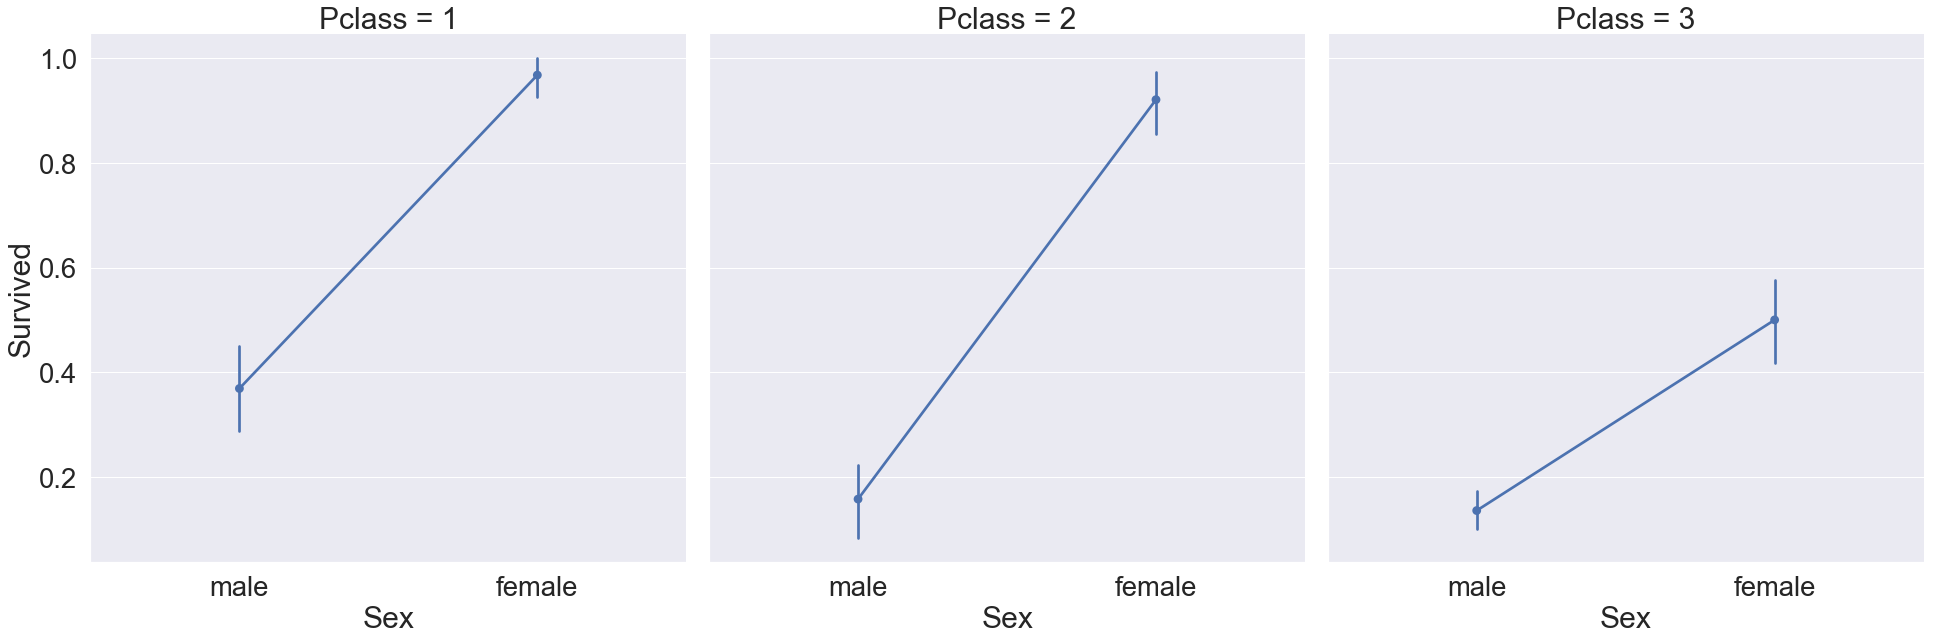

In [31]:
sns.factorplot(x='Sex',y='Survived', col="Pclass",
               data=df_train, satureation=.5,
               size=9, aspect=1)

# 2.4 Age

In [32]:
print('제일 나이 많은 탑승객: {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객: {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이: {:.1f} Years'.format(df_train['Age'].mean()))


제일 나이 많은 탑승객: 80.0 Years
제일 어린 탑승객: 0.4 Years
탑승객 평균 나이: 29.7 Years


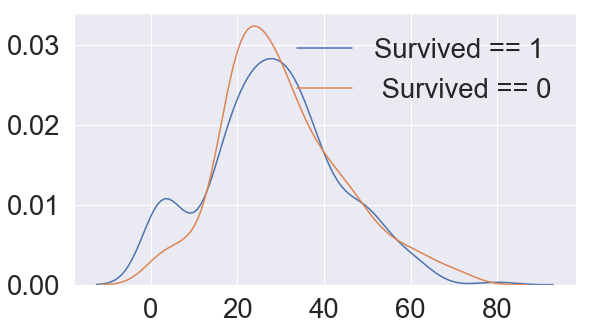

In [33]:
#생존에 따른 Age의 histogram
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived'] ==1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] ==0]['Age'], ax=ax)
plt.legend(['Survived == 1',' Survived == 0'])
plt.show()

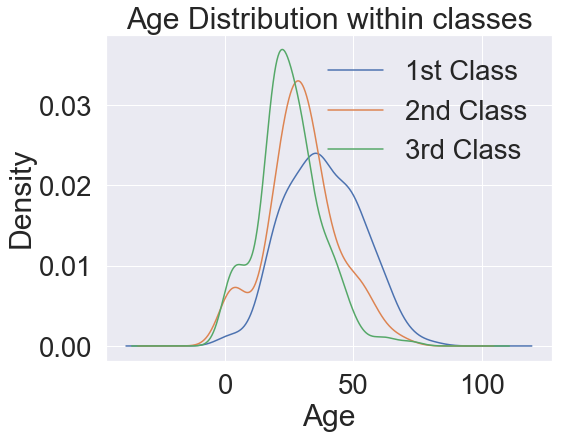

In [34]:
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class','3rd Class'])


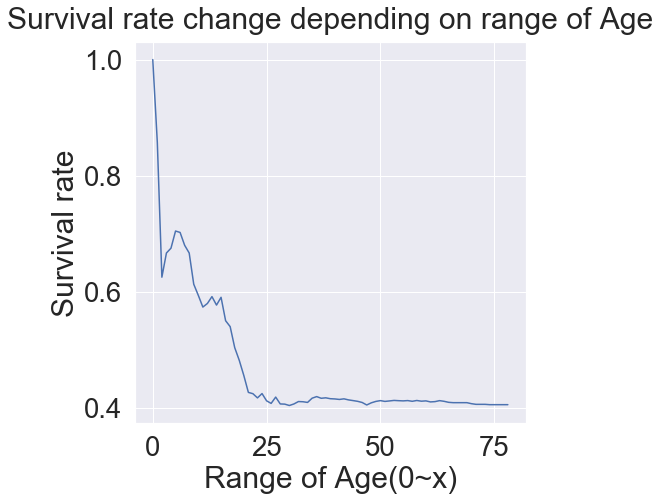

In [41]:
# 나이대가 변하면서 생존률이 어떻게 되는지 나이 범위를 넓혀가며 확인
cummulate_survival_ratio = []
for i in range(1, 80):
    # 생존여부(1 or 0) 전체 합/전체 길이 -> 생존률
    cummulate_survival_ratio.append(df_train[df_train['Age']< i]['Survived'].sum() / len(df_train[df_train['Age']<i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

* 나이가 어릴 수록 생존률이 높음
* 나이가 중요한 feature로 쓰일 수 있음

# 2.5 Pclass, Sex, Age
- 변수 모두에 대해서 보고 싶을 때 seaborn의 violingplot
- x 축: 나눠서 보고 싶어하는 case(Pclass, Sex)
- y 축: 보고 싶어하는 distribution(Age)

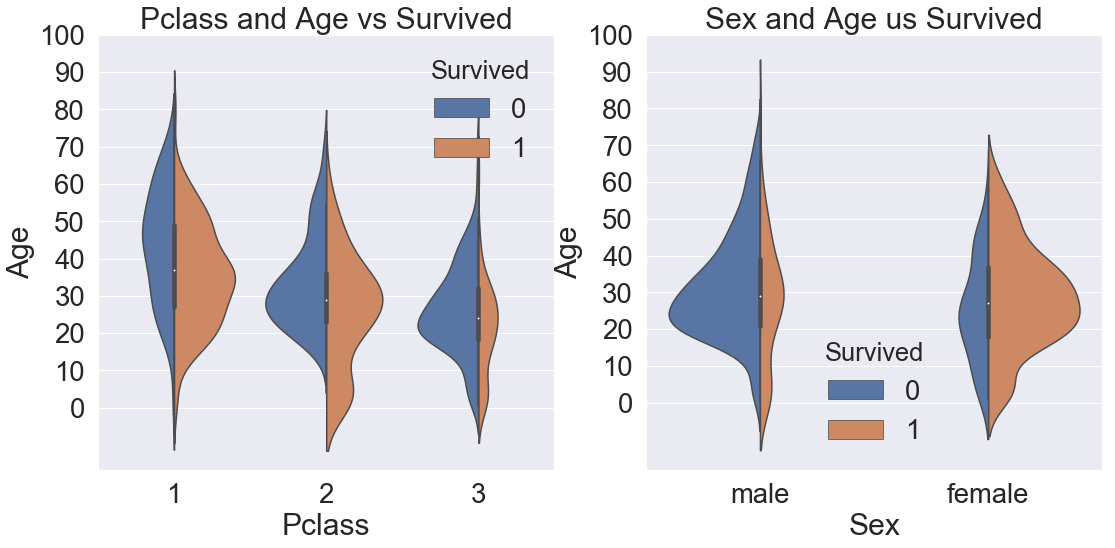

In [44]:
f, ax = plt.subplots(1,2, figsize=(18,8))
sns.violinplot("Pclass","Age", hue = "Survived",data= df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title("Pclass and Age vs Survived")
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex", "Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title("Sex and Age us Survived")
ax[1].set_yticks(range(0,110,10))
plt.show()

# 2.6 Embarked
- 탑승한 항구
- 탑승한 곳에 따른 생존률 확인

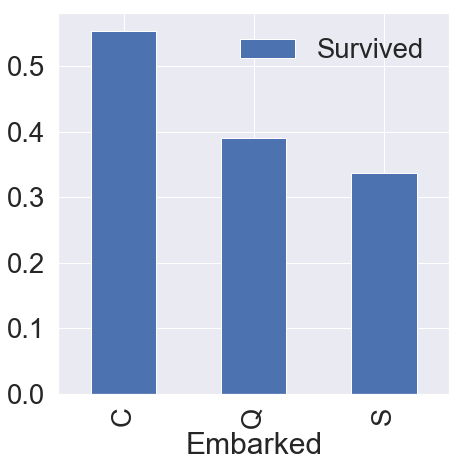

In [49]:
f, ax= plt.subplots(1,1, figsize=(7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

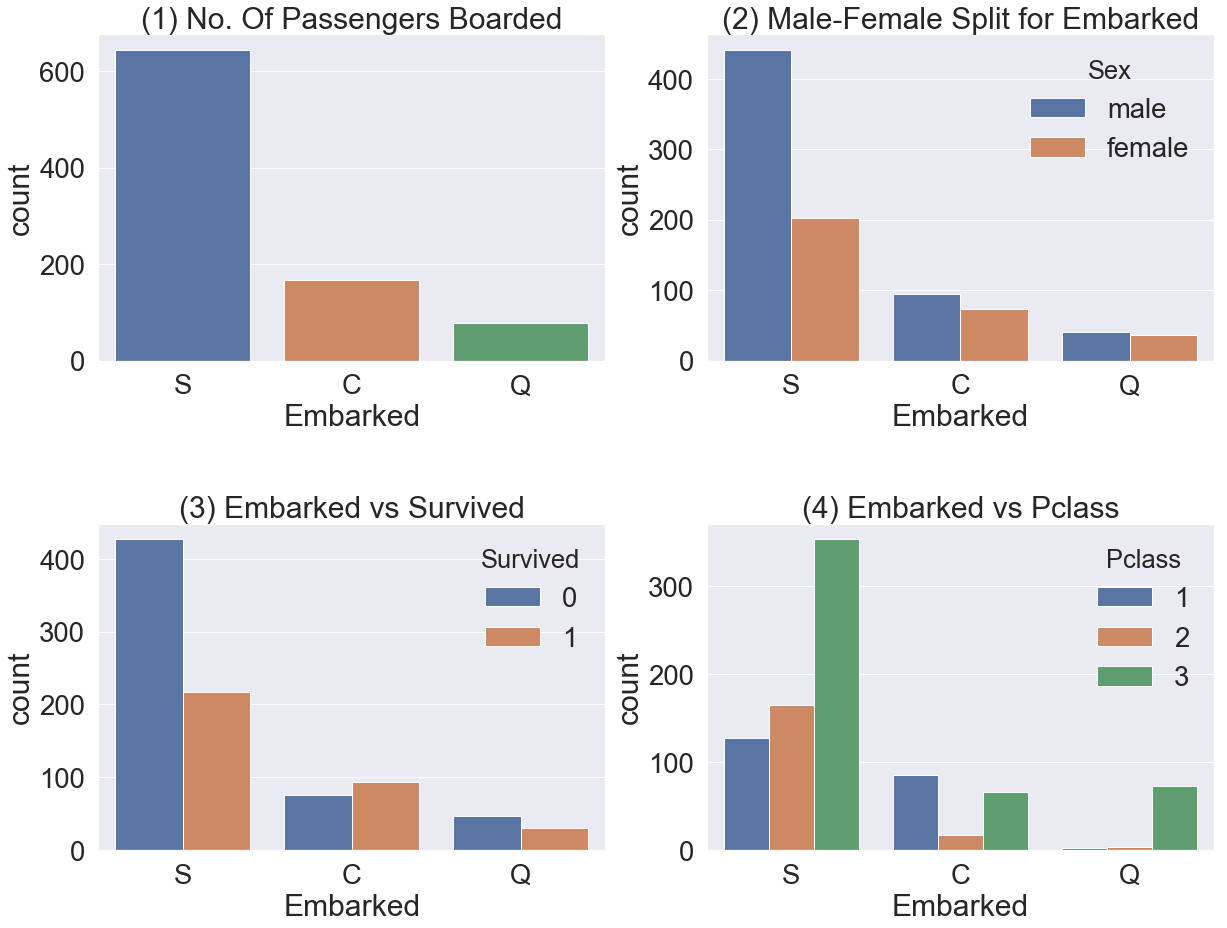

In [51]:
f, ax = plt.subplots(2,2,figsize=(20, 15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data = df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data = df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data = df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


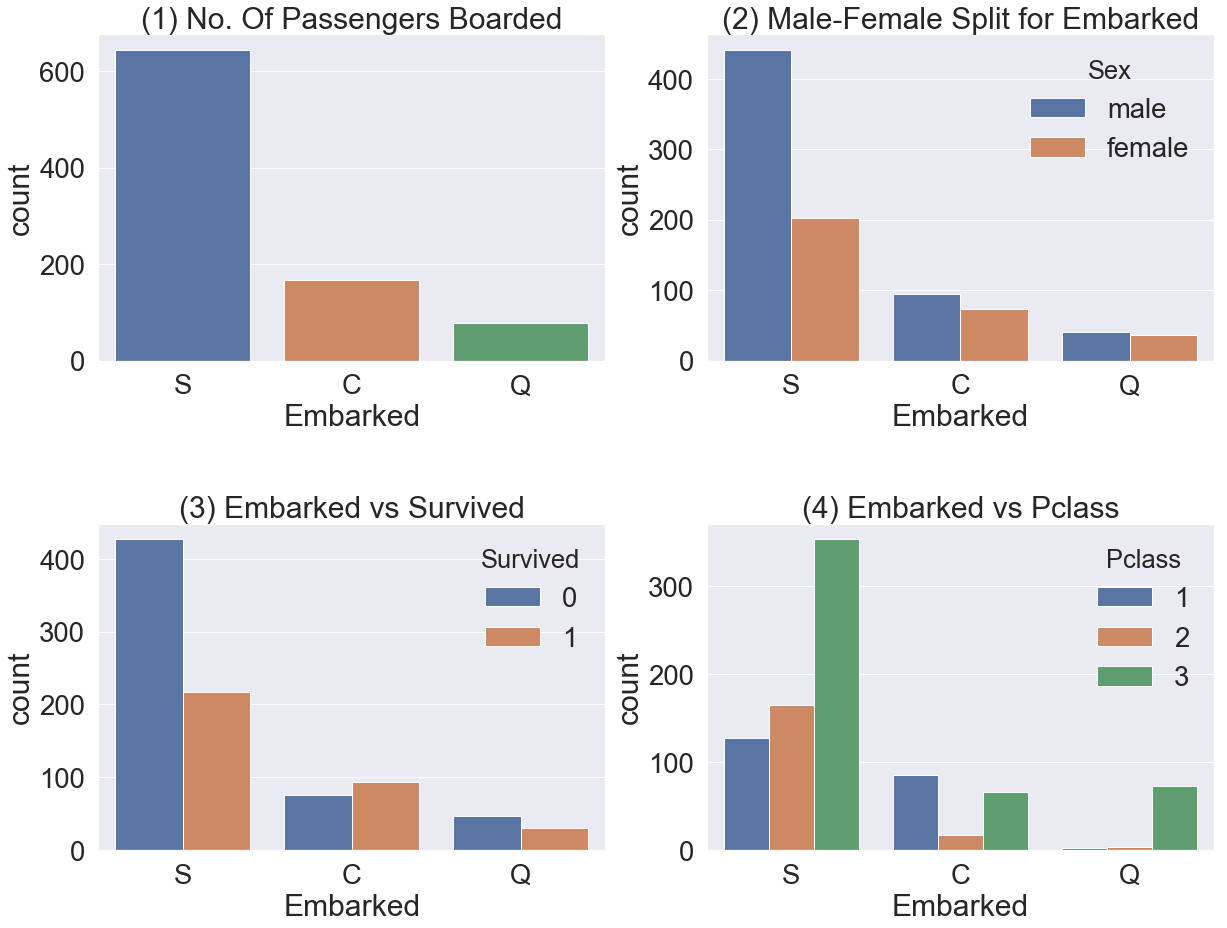

In [53]:
f

* figure(1) - s에서 가장 많은 사람 탑승
* figure(2) - C와 Q는 남녀 비율 비슷, S는 남자가 더 많음
* figure(3) - 생존확률이 S의 경우 많이 낮음
* figure(4) - C가 생존확률이 높은 것은 클래스가 높은 사람이 많이 탔기 때문. S는 3rd class가 많이 타서 생존률이 낮게 나옴

# 2.7 Family = SibSp(형제 자매) + Parch(부모, 자녀)

In [54]:
df_train['FamilySize']=df_train['SibSp']+df_train['Parch']+1 #자신 포함
df_test['FamilySize'] = df_test['SibSp']+df_test['Parch']+1

In [55]:
print('Maximum size of Family: ', df_train['FamilySize'].max())
print('Maximum size of Family: ', df_train['FamilySize'].min())

Maximum size of Family:  11
Maximum size of Family:  1


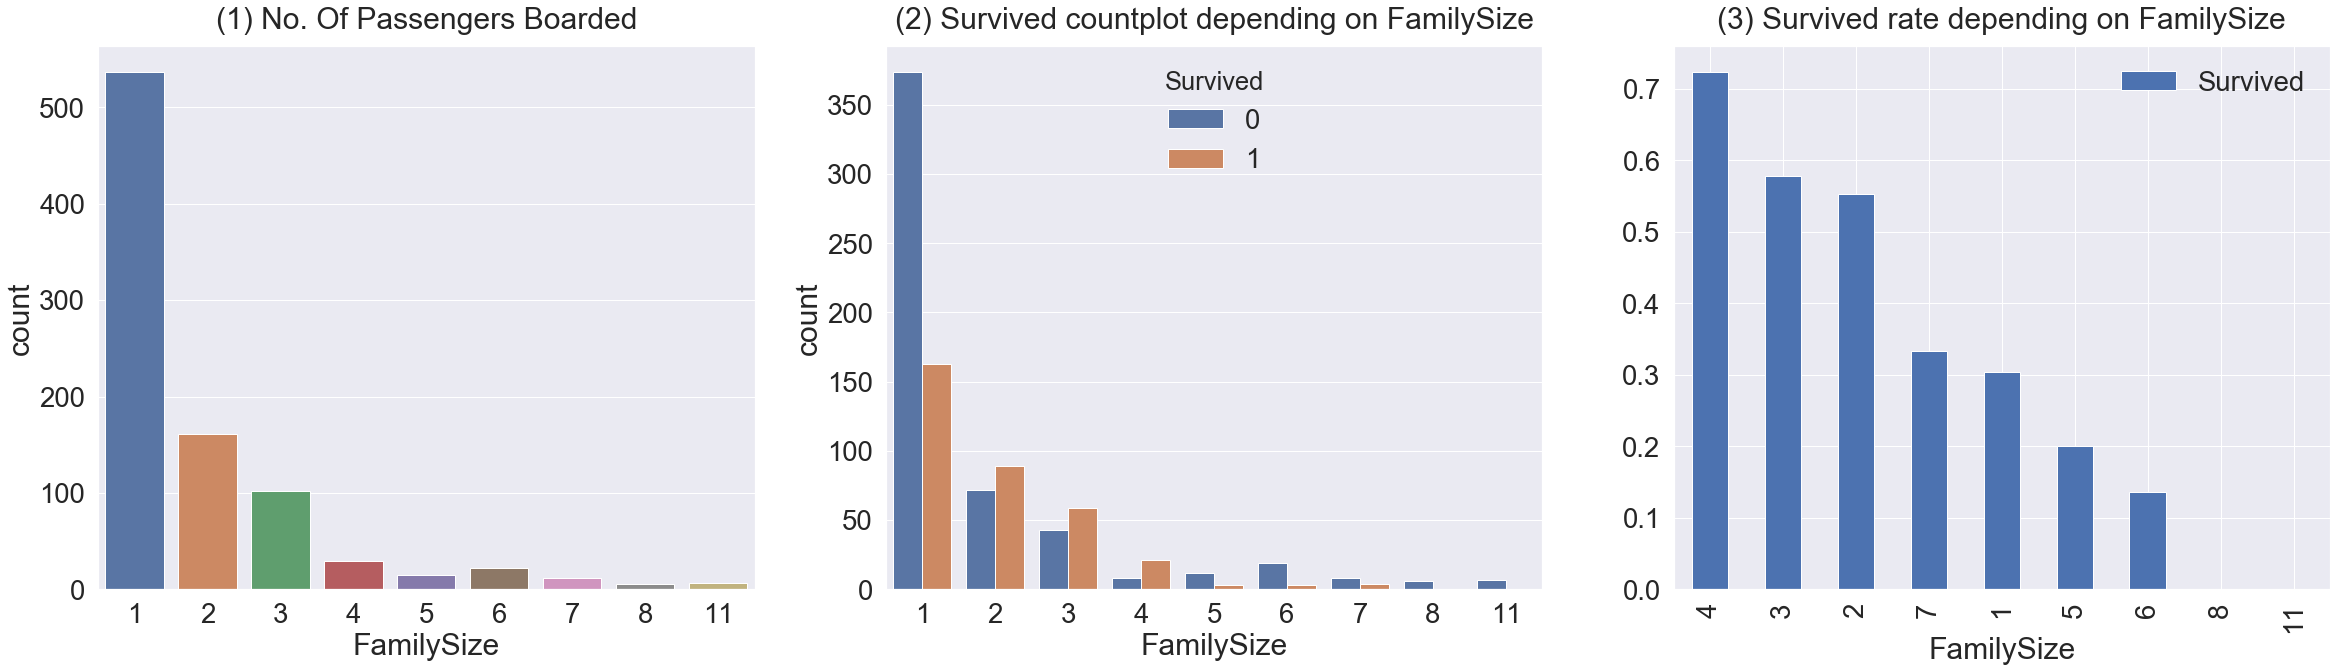

In [56]:
f, ax = plt.subplots(1,3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02) #y: 제목의 세로축 위치

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending = False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

* figure(1) - 가족크기가 11까지. 대부분 1명
* figure(2), (3) - 가족 크기에 따른 생존비교, 가족수가 많아질수록, 생존확률이 낮아짐. 가족수가 너무 작아도, 너무 커도 생존확률이 작음. 3~4명 선에서 생존확률이 높음

### Axes.set_title
- 축 제목 설정

https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_title.html

### pyplot.subplots_adjust
- 서브 플롯 레이아웃 조정
- wspace: 서브 플롯 사이의 공백을 위해 예약된 너비
- hspace: 서브 플롯 사이의 공백을 위해 예약된 높이
-> 둘 다 0이면 서브 플롯 간 간격 제거 의미

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots_adjust.html

# 2.8 Fare
- 탑승요금, continuous feature

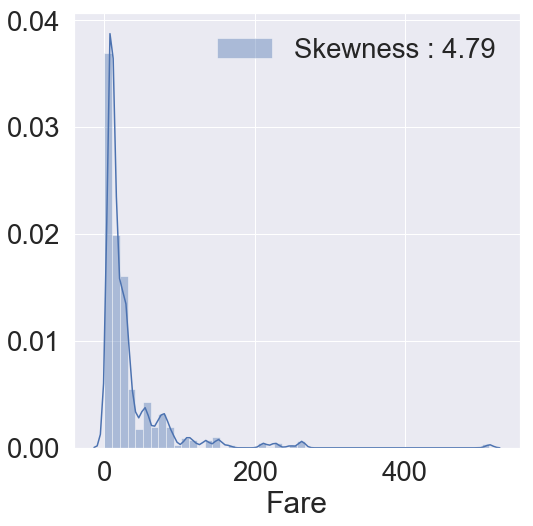

In [58]:
fig, ax=plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best') #범례 위치 

* 분포가 매우 비대칭 -> log 변환
* map, apply: dataFrame의 특정 columns에 공통된 작업을 적용하고 싶을 때 손쉽게 적용 가능

In [59]:
df_test.loc[df_test.Fare.isnull(), 'Fare']=df_test['Fare'].mean()

df_train['Fare']=df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare']=df_test['Fare'].map(lambda i: np.log(i) if i>0 else 0)

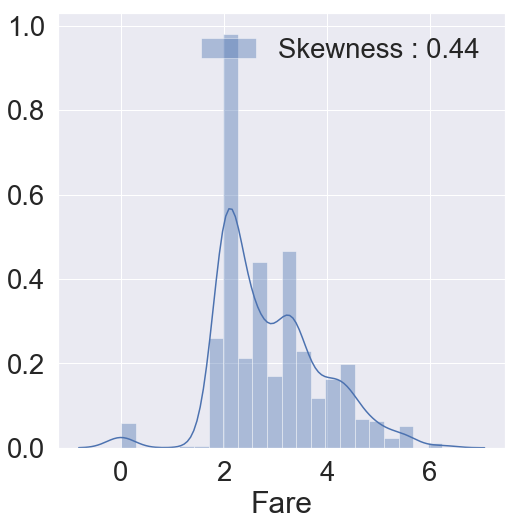

In [60]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(df_train['Fare'], color = 'b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

# 2.9 Cabin
- NaN이 대략 80%. 

In [61]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


# 2.10 Ticket

In [62]:
df_train['Ticket'].value_counts()

347082           7
CA. 2343         7
1601             7
347088           6
3101295          6
                ..
19988            1
36568            1
349204           1
343275           1
SC/PARIS 2149    1
Name: Ticket, Length: 681, dtype: int64

In [65]:
import plotly.offline as py #plotly를 오프라인으로 그리기 위해
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# 3. Feature engineering
- null data 채우기(통계량 참고, 혹은 다른 아이디어)
- train 뿐만 아니라 test도 똑같이 적용

# 3.1 Fill Null
## 3.1.1
- age 에는 null data가 177개 존재. title + statistics를 사용해 채워보자
- 타이틀: Miss, Mr, Mrs
- str method: panas series의 data를 string으로 바꿔주늠
- extract method: 정규표현식 적용해줌

In [66]:
df_train['Initial']= df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial']=df_test.Name.str.extract('([A-Za-z]+)\.')

In [68]:
df_train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [69]:
#추출한 initial 과 sex간 count 비교
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [73]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                           ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'], inplace=True)
df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                           ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'], inplace=True)


In [74]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


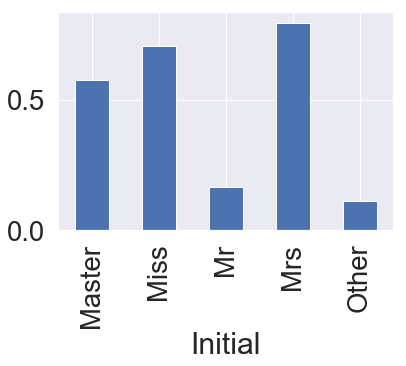

In [75]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [76]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


In [77]:
#위의 평균 값으로 age의 null 값 채우기

df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'), 'Age']=33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'), 'Age']=36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'), 'Age']=5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'), 'Age']=22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'), 'Age']=46
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'), 'Age']=33


df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'), 'Age']=33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'), 'Age']=36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'), 'Age']=5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'), 'Age']=22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'), 'Age']=46
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'), 'Age']=33

## 3.1.2. Fill Null in Embarked

In [78]:
print('Embarked has', sum(df_train['Embarked'].isnull()), ' Null values')

Embarked has 2  Null values


In [79]:
df_train['Embarked'].fillna('S', inplace=True)#S의 비중이 가장 컸으므로

# 3.2 Change Age(continuous to categorical)
- age를 category화

In [80]:
# 첫 번째 방법 - loc 사용한 방법
df_train['Age_cat']=0
df_train.loc[df_train['Age']<10,'Age_cat']=0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

df_test['Age_cat'] = 0
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7

In [81]:
#두 번째 방법 - 간단한 함수를 만들어 apply 메소드에 넣어주는 방법
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7    
    
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

* 둘 다 같은 결과를 내야 두 가지 방법이 잘 적용된 것!
* 이를 확인하기 위해 series간 boolean 비교 후 all() 메소드 사용. all() 메소드는 모든 값이 True면 True, 하나라도 False가 있으면 False를 줌

In [82]:
print('1번 방법, 2번 방법 둘 다 같은 결과를 내면 True 줘야 함 -> ', (df_train['Age_cat']==df_train['Age_cat_2']).all())

1번 방법, 2번 방법 둘 다 같은 결과를 내면 True 줘야 함 ->  True


In [83]:
df_train.drop(['Age','Age_cat_2'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

# 3.3 Change Initial, Embarked and Sex(string to numerical)


In [84]:
df_train['Initial'] = df_train['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})
df_test['Initial'] = df_test['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})

In [85]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [86]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [88]:
#embared가 S, C, Q로 이루어짐. map을 사용해 변환
df_train['Embarked'] = df_train['Embarked'].map({'C':0, 'Q':1, 'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [89]:
# any()를 사용해 null이 한 개라도 있을 시 True 반환
df_train['Embarked'].isnull().any()

False

In [90]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

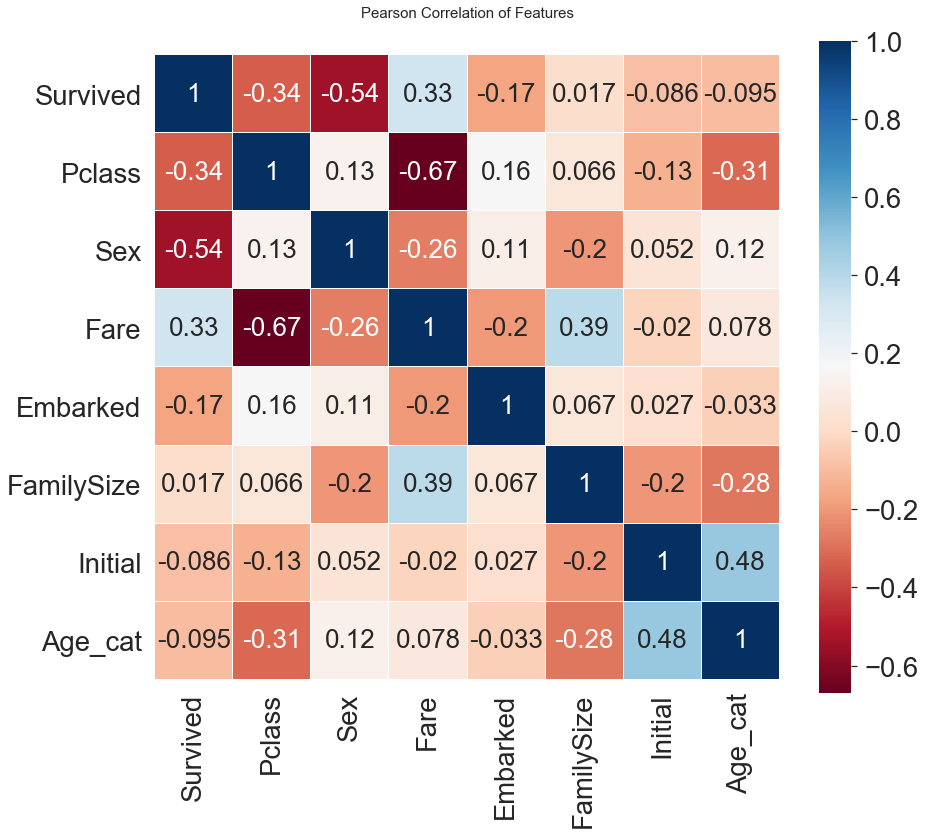

In [94]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 26})

del heatmap_data

### sns.heatmap()
* annot=True: 각 셀에 숫자 입력
* annot_kws : 각 셀 숫자 옵션들
* vmin, vmax: 오른쪽 표 최대, 최솟 값


# 3.4 One-hot encoding on Initial and Embarked
- 모델의 성능을 높이기 위해
- Initial 을 prefix로 두어 구분 쉽게 만들어 줌 -> 가변수의 공통 접두사

In [95]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [96]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


In [97]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

# 3.5 Drop columns

In [98]:
df_train.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'], axis=1, inplace=True)

In [99]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [100]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6,0,0,1,0,0,0,1,0
3,3,1,2.159003,1,2,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,2,0,0,0,1,0,0,0,1


# 4 Builiding machine learning model and prediction using the trained model

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

# 4.1 Preparation - Split dataset into train, valid, test set

In [102]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [103]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

# 4.2 Model generation and prediction

In [104]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [105]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100*metrics.accuracy_score(prediction, y_vld)))

총 268명 중 81.72% 정확도로 생존을 맞춤


# 4.3 Feature importance
- 지금 만든 모델이 어떤 feature에 영향을 많이 받았는지 확인

In [106]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

In [107]:
Series_feat_imp

Pclass        0.096483
Sex           0.097889
Fare          0.329090
FamilySize    0.099621
Age_cat       0.122710
Initial_0     0.008883
Initial_1     0.034319
Initial_2     0.138167
Initial_3     0.024374
Initial_4     0.006297
Embarked_0    0.012679
Embarked_1    0.013261
Embarked_2    0.016228
dtype: float64

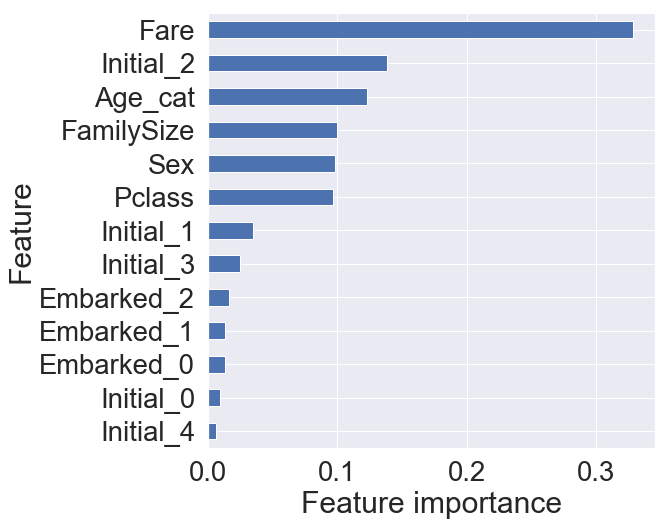

In [109]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh() 
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

### barh()
- (x데이터가 카테고리 값인 경우)가로 방향으로 바차트 시각화

# 4.4 Prediction on Test set

In [110]:
submission = pd.read_csv('gender_submission.csv')

In [111]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [112]:
prediction = model.predict(X_test)
submission['Survived']=prediction

In [113]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [114]:
X_test

array([[3.        , 1.        , 2.05786033, ..., 0.        , 1.        ,
        0.        ],
       [3.        , 0.        , 1.94591015, ..., 0.        , 0.        ,
        1.        ],
       [2.        , 1.        , 2.27083639, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [3.        , 1.        , 1.98100147, ..., 0.        , 0.        ,
        1.        ],
       [3.        , 1.        , 2.08567209, ..., 0.        , 0.        ,
        1.        ],
       [3.        , 1.        , 3.10719762, ..., 1.        , 0.        ,
        0.        ]])

In [115]:
submission.to_csv('my_first_submission.csv', index=False)